# Tarea 2: Cuadratura Gaussiana, documentación de código y Git  (6%)
Gabriel Contreras Abellán

C12251 

29/09/2025

## I. CUADRATURA GAUSSIANA (3.0%)


#### Insrucciones:
El propósito de esta sección es aplicar el concepto de cuadratura Gaussiana para integración utilizando los polinomios de Legendre.

* Escriba un script de python cuadrature.py que resuelve la siguiente integral utilizando el método de cuadratura Gaussiana vista en clase (Tema 04/GaussianCuadratureAndFitting.ipynb):

\begin{equation}
I = \int_{1}^{3} dx [x^6 - x^2 sin(2x)]
\end{equation}

Puede utilizar las mismas rutinas que se utilizan en el documento Tema 04/GaussianCuadratureAndFitting.ipynb. ¿Con cuál valor de N se alcanza el resultado exacto?
* Script de python que ejecuta el método numérico y devuelve el resultado correcto: 1.5%
* Funcion que devuelve los pesos y puntos de colocación: 0.5%
* Funcion que escala el intervalo de integración: 0.5%
* Pruebas con distintos valores de N hasta alcanzar el resultado correcto: 0.5%

### Script:

In [1]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

In [2]:
# Función que vamos a integrar
def func(x):
    return x**6 - x**2 * np.sin(2*x)

In [3]:
# Obtener puntos y pesos en [-1, 1]
def gaussxw(N):
    x, w = np.polynomial.legendre.leggauss(N)
    return x, w

In [4]:
# Escalar los puntos y pesos al intervalo [a, b]
def gaussxwab(a, b, x, w):
    return 0.5 * (b - a) * x + 0.5 * (b + a), 0.5 * (b - a) * w

In [5]:
# Integración usando cuadratura gaussiana
def integrar_gauss(f, a, b, N):
    x, w = gaussxw(N)
    xp, wp = gaussxwab(a, b, x, w)
    return np.sum(wp * f(xp))

In [6]:
# Limites de integración
a = 1
b = 3

In [ ]:
# Evaluar para diferentes valores de N
# Para N=2
x2, w2 =gaussxw(2)
xp2, wp2 = gaussxwab(a, b, x2, w2)
I2 = np.sum(wp2 * func(xp2))
print(f"Para N=2 la integral es aproximadamente {I2:.12f}")

# Para N=3
x3, w3 =gaussxw(3)
xp3, wp3 = gaussxwab(a, b, x3, w3)
I3 = np.sum(wp3 * func(xp3))
print(f"Para N=3 la integral es aproximadamente {I3:.12f}")

# Para N=4
x4, w4 =gaussxw(4)
xp4, wp4 = gaussxwab(a, b, x4, w4)
I4 = np.sum(wp4 * func(xp4))
print(f"Para N=4 la integral es aproximadamente {I4:.12f}")

# Para N=5
x5, w5 =gaussxw(5)
xp5, wp5 = gaussxwab(a, b, x5, w5)
I5 = np.sum(wp5 * func(xp5))
print(f"Para N=5 la integral es aproximadamente {I5:.12f}")

# Para N=6
x6, w6 =gaussxw(6)
xp6, wp6 = gaussxwab(a, b, x6, w6)
I6 = np.sum(wp6 * func(xp6))
print(f"Para N=6 la integral es aproximadamente {I6:.12f}")

Para N=2 la integral es aproximadamente 306.819934495920
Para N=3 la integral es aproximadamente 317.264151733829
Para N=4 la integral es aproximadamente 317.345390334158
Para N=5 la integral es aproximadamente 317.344226721970
Para N=6 la integral es aproximadamente 317.344246889996
Para N=7 la integral es aproximadamente 317.344246672227
Para N=8 la integral es aproximadamente 317.344246673835
Para N=9 la integral es aproximadamente 317.344246673826


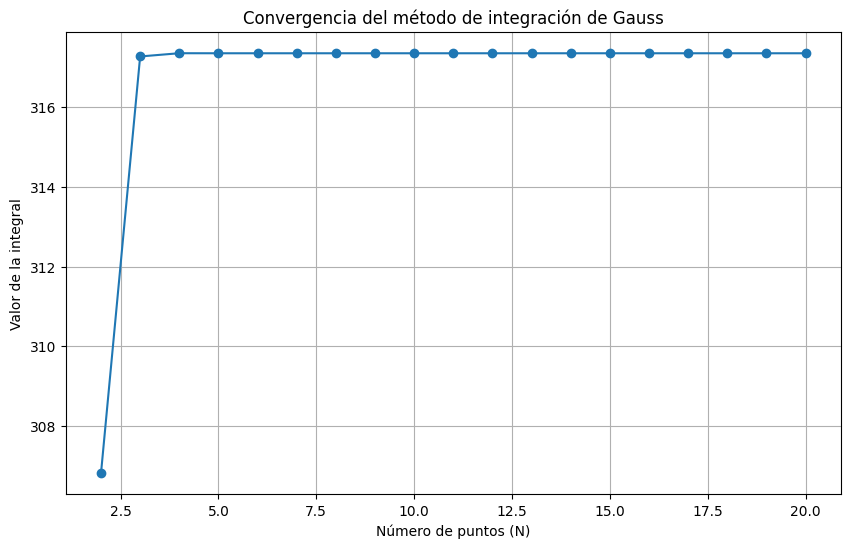

In [9]:
# Graficar la convergencia
Ns = np.arange(2, 21)
Is = [integrar_gauss(func, a, b, N) for N in Ns]
plt.figure(figsize=(10, 6))
plt.plot(Ns, Is, marker='o')
plt.xlabel('Número de puntos (N)')
plt.ylabel('Valor de la integral')
plt.title('Convergencia del método de integración de Gauss')
plt.grid()
plt.show()

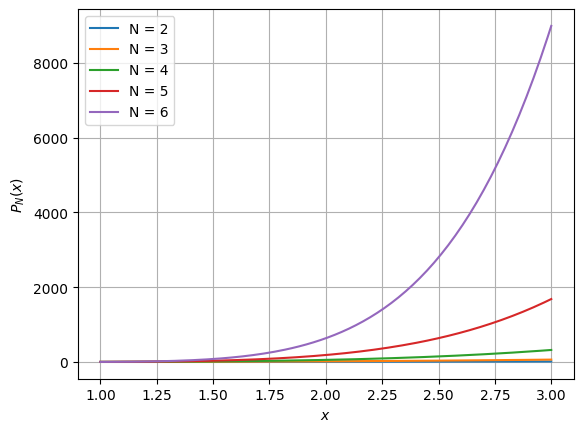

In [13]:
x = np.linspace(1, 3, 128)
plt.figure(dpi=100)
for N in range(2,7):
    plt.plot(x, legendre(N)(x), label='N = {}'.format(N))
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$P_N(x)$")
plt.legend()
plt.show()

## Explicación

La **cuadratura Gaussiana** es uno de los métodos más poderosos para evaluar integrales de forma numérica.  
La idea principal está dada por

\begin{equation}
\int_a^b f(x)\,dx \;\approx\; \sum_{k=1}^{N} w_k f(x_k),
\end{equation}

donde:
- $w_k$ son los "pesos"
- $x_k$ son los puntos de muestreo


### Regla teórica (exactitud de Gauss–Legendre):

Una cuadratura de Gauss–Legendre con $n$ puntos integra exactamente cualquier polinomio de grado $2n-1$. Por eso, para la parte polinómica de grado 6 se necesita:

\begin{equation}
2n - 1 \;\geq\; 6 \quad \Longrightarrow \quad n \geq 4.
\end{equation}


### El integrando completo:

La parte $-x^2 \sin(2x)$, como $\sin(2x)$ no es un polinomio, **no existe un $N$ finito** que haga la cuadratura Gauss–Legendre exacta en sentido estricto para todo término trigonométrico.  

Sin embargo, la cuadratura converge muy rápido para funciones suaves: basta elegir $n$ moderado para alcanzar la precisión deseada.


### Referencia:

Valor exacto evaluado:

$$
I = 317.3442466738263
$$

### En resumen:

- $n=3 \;\;\Rightarrow\;\; \text{aprox} \approx 317.264151733829, \quad \text{error} \approx 8.0 \times 10^{-2}$
- $n=4 \;\;\Rightarrow\;\; \text{aprox} \approx 317.345390334158, \quad \text{error} \approx 1.1 \times 10^{-3}$
- $n=5 \;\;\Rightarrow\;\; \text{aprox} \approx 317.344226721970, \quad \text{error} \approx 2.0 \times 10^{-5}$
- $n=6 \;\;\Rightarrow\;\; \text{aprox} \approx 317.344246889996, \quad \text{error} \approx 2.2 \times 10^{-7}$

___


## II. DOCUMENTACIÓN Y GIT (3.0%)

#### Instrucciones:
El propósito de esta tarea es practicar los conceptos de control de versiones bajo la implementación de Git y la creación de documentos de referencia utilizando MkDocs. Su resultado final es un link (URL) que incluye la documentación, utilizando su cuenta de GitHub como host para la página web. Usted debe entregar:

* Un URL con el cual se accesa de manera pública su página web que contiene la documentación del código (3.0%)

Los pasos para generar su página web que contiene la documentación son los mismos que seguimos en clase.

Si necesita una referencia para el uso de MkDocs, utilice este tutorial para más informacián en como generar documentación con MkDocs: [Realpython_MkDocs](https://realpython.com/python-project-documentation-with-mkdocs/) (ignore lo referente a Type Hints). Es posible que tenga que crear una cuenta para visualizar el artículo.

##### Descripción:
El objetivo es documentar la implementación del método de cuadratura Gaussiana implementado en el apartado anterior. Su documentación debe incluir los siguientes apartados:


1. index.md: Introduccion al problema a resolver (recuerde que estos documentos usan el mismo lenguaje Markdown) (0.5%)
2. explanation.md: Describe el método numérico a utilizar, con la información que usamos en clase (0.75%)
3. tutorials.md: Incluye un ejemplo de uso (0.75%)
4. reference.md: contiene la documentacion de las funciones. Debe ser generado de forma automática con los docstrings que contiene el modulo como tal. Los *docstrings* deben contener ejemplos de uso. Usted debe escribir las funciones y documentar su uso, argumentos esperados y resultados de salida. (1.0%)

Utilice el estilo de *docstrings* (PEP 257-compliant) que utilizamos en clase (ver *sum.py* en Tema_06 del repositorio del curso).

**Usted solo debe entregar el URL de su pagina web con el host en GitHub, que contiene toda la información del módulo.**



#### Github:
https://github.com/GContreras-hub/Cuadrature-Tarea-2

#### MkDocs:
https://gcontreras-hub.github.io/Cuadrature-Tarea-2/